<a href="https://colab.research.google.com/github/leticiafreit/leticiafreit.github.io/blob/main/ProjetoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indicadores de Doenças Cardiovasculares**

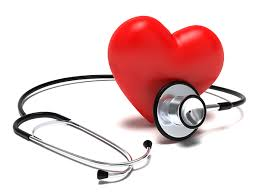

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importando a base de dados:

In [ ]:
df = pd.read_csv("/content/heart_2020_cleaned.csvv.csv")
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,"No,26.45,No,No,No,0.0,0.0,No,Female,80 or olde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


Veirificando quantos NaN tem em cada variável:

In [ ]:
faltantes = df.isnull().sum() # mostra quantos dados estão faltando em cada variável
print(faltantes)

HeartDisease          0
BMI                 341
Smoking             342
AlcoholDrinking     342
Stroke              342
PhysicalHealth      342
MentalHealth        342
DiffWalking         342
Sex                 342
AgeCategory         342
Race                342
Diabetic            342
PhysicalActivity    342
GenHealth           342
SleepTime           342
Asthma              342
KidneyDisease       342
SkinCancer          342
dtype: int64


In [ ]:
faltantes_percentual = ( df.isnull().sum() / len(df['HeartDisease']))*100 ## mostra o percentual de dados que estão faltando em cada variável /pelo total de daddos
print(faltantes_percentual)

HeartDisease        0.000000
BMI                 2.601266
Smoking             2.608895
AlcoholDrinking     2.608895
Stroke              2.608895
PhysicalHealth      2.608895
MentalHealth        2.608895
DiffWalking         2.608895
Sex                 2.608895
AgeCategory         2.608895
Race                2.608895
Diabetic            2.608895
PhysicalActivity    2.608895
GenHealth           2.608895
SleepTime           2.608895
Asthma              2.608895
KidneyDisease       2.608895
SkinCancer          2.608895
dtype: float64


Aproximadamente 2% de dados faltantes de cada variável

In [ ]:
enulo = df.isnull() #identifica aonde os dados estão faltando
enulo.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Criando um novo DataFrame(df2) para armazenar os dados sem NaN:

In [ ]:
df2 = df.dropna() # elimina as linhas com NaN
df2.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No


Comparação de linhas e colunas entre o DataFrame1 (df) e DataFrame2 (df2) :

In [ ]:
df.shape # linhas, colunas

(13109, 18)

In [ ]:
df2.shape #linhas, colunas sem NaN

(12767, 18)

In [ ]:
df2.dtypes # tipos das variáveis

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Transformar os dados categóricos em numéricos:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2["Race"].unique() #função usada para encontrar os elementos únicos de uma coluna

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
df2["Race"].value_counts()

White                             9070
Black                             1235
Hispanic                          1095
American Indian/Alaskan Native     734
Other                              461
Asian                              172
Name: Race, dtype: int64

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df2.loc[:,"Race"] = label_encoder.fit_transform(df2["Race"]) # função loc para resgatar dados

In [ ]:
df2["Race"].unique()

array([5, 2, 1, 0, 4, 3])

In [ ]:
df2["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
 #trnasformando em dados numéricos
df2.loc[:, "AgeCategory"] = label_encoder.fit_transform(df2["AgeCategory"])


In [ ]:
df2["AgeCategory"].unique()

array([ 7, 12,  9, 11,  4, 10,  8,  6,  5,  0,  3,  2,  1])

In [ ]:
df2["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
df2.loc[:,"GenHealth"] = label_encoder.fit_transform(df2["GenHealth"])

In [ ]:
df2["GenHealth"].unique()

array([4, 1, 2, 3, 0])

In [ ]:
df2.loc[:,"Smoking"] = label_encoder.fit_transform(df2["Smoking"])
df2.loc[:,"AlcoholDrinking"] = label_encoder.fit_transform(df2["AlcoholDrinking"])
df2.loc[:,"Stroke"] = label_encoder.fit_transform(df2["Stroke"])
df2.loc[:,"DiffWalking"] = label_encoder.fit_transform(df2["DiffWalking"])
df2.loc[:,"Sex"] = label_encoder.fit_transform(df2["Sex"])
df2.loc[:,"Diabetic"] = label_encoder.fit_transform(df2["Diabetic"])
df2.loc[:,"PhysicalActivity"] = label_encoder.fit_transform(df2["PhysicalActivity"])
df2.loc[:,"Asthma"] = label_encoder.fit_transform(df2["Asthma"])
df2.loc[:,"KidneyDisease"] = label_encoder.fit_transform(df2["KidneyDisease"])
df2.loc[:,"SkinCancer"] = label_encoder.fit_transform(df2["SkinCancer"])

In [ ]:
df2.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,No,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,No,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,No,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
5,Yes,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,No,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,No,31.64,1,0,0,5.0,0.0,1,0,12,5,1,0,2,9.0,1,0,0
9,No,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0
10,Yes,34.30,1,0,0,30.0,0.0,1,1,8,5,1,0,3,15.0,1,0,0


Todos os dados estão numéricos menos a variável
dependente


...............................................................................................................................


Gráficos:

In [ ]:
df2.corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
BMI,1.000000,-0.026303,-0.026365,0.020634,0.105491,0.066179,0.172983,0.018507,-0.047222,-0.099003,0.191439,-0.143685,0.014992,-0.048817,0.089473,0.040371,-0.052790
Smoking,-0.026303,1.000000,0.113970,0.050273,0.100984,0.070150,0.110274,0.107026,0.111810,0.057161,0.032076,-0.090462,0.022818,-0.013813,0.031359,0.010964,0.037128
AlcoholDrinking,-0.026365,0.113970,1.000000,-0.015857,-0.007711,0.022887,-0.046160,0.024385,-0.051928,0.027216,-0.061539,0.008512,0.023630,-0.014448,-0.001243,-0.025423,0.001975
Stroke,0.020634,0.050273,-0.015857,1.000000,0.134746,0.060351,0.185291,-0.005055,0.136204,-0.022099,0.100425,-0.072363,-0.007616,0.013204,0.053174,0.079725,0.045917
PhysicalHealth,0.105491,0.100984,-0.007711,0.134746,1.000000,0.296050,0.434569,-0.042962,0.112586,-0.000338,0.157629,-0.242680,-0.027206,-0.056209,0.127586,0.139125,0.051374
MentalHealth,0.066179,0.070150,0.022887,0.060351,0.296050,1.000000,0.156707,-0.107155,-0.131928,-0.013962,0.047335,-0.112724,-0.014525,-0.115149,0.100768,0.039532,-0.032874
DiffWalking,0.172983,0.110274,-0.046160,0.185291,0.434569,0.156707,1.000000,-0.069348,0.242561,-0.007639,0.210533,-0.293507,-0.048645,-0.028891,0.109190,0.133676,0.063070
Sex,0.018507,0.107026,0.024385,-0.005055,-0.042962,-0.107155,-0.069348,1.000000,-0.064289,0.018831,-0.010714,0.065891,-0.014642,-0.011446,-0.067971,-0.018405,0.018356
AgeCategory,-0.047222,0.111810,-0.051928,0.136204,0.112586,-0.131928,0.242561,-0.064289,1.000000,0.183953,0.174020,-0.121075,0.044784,0.108159,-0.032318,0.123568,0.294780
Race,-0.099003,0.057161,0.027216,-0.022099,-0.000338,-0.013962,-0.007639,0.018831,0.183953,1.000000,-0.055877,0.053937,0.057101,0.007861,-0.009483,0.009772,0.170340


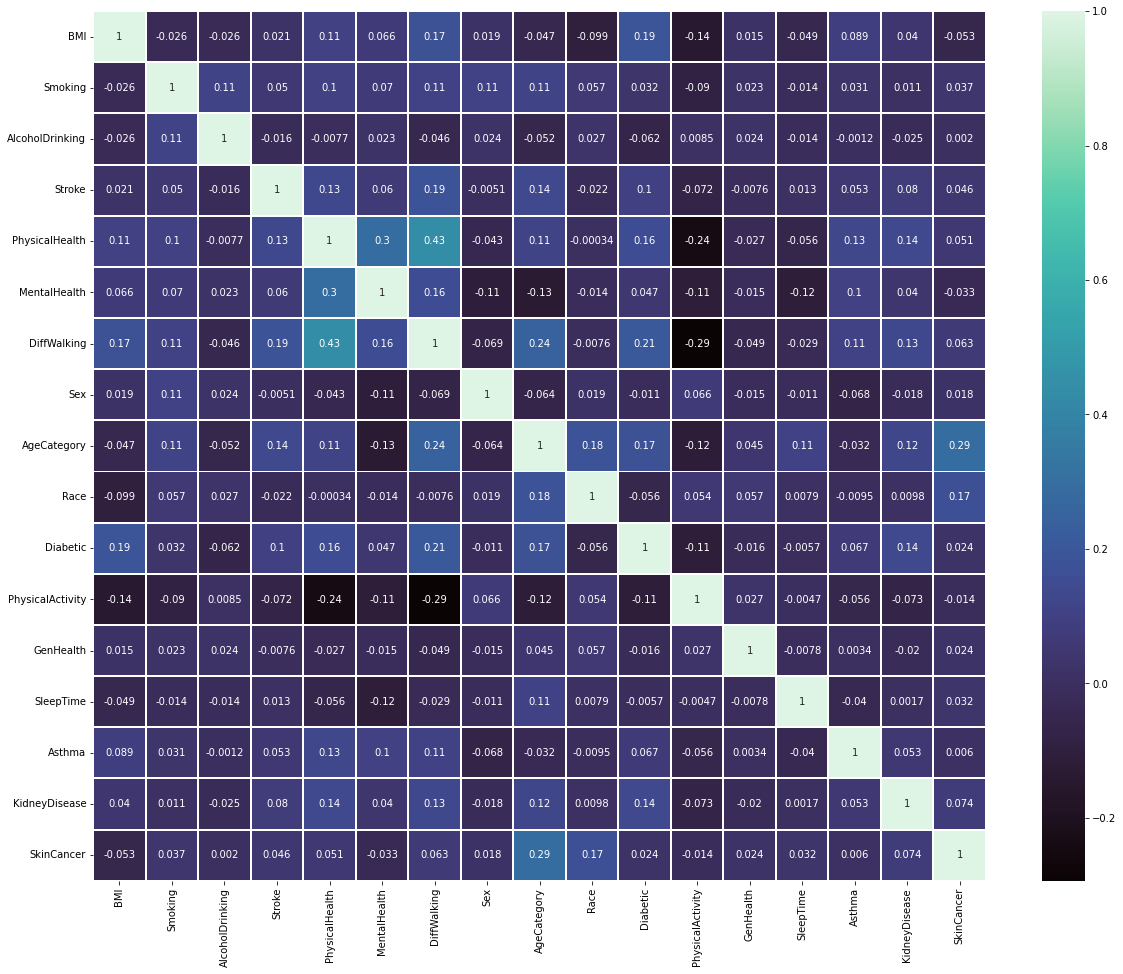

In [ ]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(20,16))
_ = sns.heatmap(df2.corr(), cmap = "mako", linewidth = 1, annot = True)

# **Treinamentos e Testes**

1. O primeiro train and test foi com o DataFrame df2 que possui todas as variáveis do DataFrame original porém numéricas.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
clf = KNeighborsClassifier (n_neighbors=5, metric='euclidean')

In [ ]:
x = df2.drop(['HeartDisease'], axis = 1) #removendo a coluna
y = df2['HeartDisease'] # variável dependente
y = LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
print("HeartDisease antes da transformação:", df2['HeartDisease'].unique())
print("HeartDisease depois da transformação:", np.unique(y))

HeartDisease antes da transformação: ['No' 'Yes']
HeartDisease depois da transformação: [0 1]


In [ ]:
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8112
           1       0.63      0.17      0.27       824

    accuracy                           0.91      8936
   macro avg       0.78      0.58      0.61      8936
weighted avg       0.89      0.91      0.89      8936



Acurácia: é a medida da precisão do modelo. Quantos ele acertou.

Precisão: é a medida da capacidade do modelo de evitar falsos positivos.

Recall: é a medida de quantos verdadeiros positivos o modelo consegue encontrar em relação ao número total de exemplos positivos.

F1 score : é uma métrica de avaliação que combina precisão e recall. E fornece uma medida única do desempenho do modelo. Ele varia entre 0 e 1. Valores mais altos indicam um melhor desempenho do modelo.

In [ ]:
y_predict_test = clf.predict(x_test)
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3480
           1       0.34      0.09      0.14       351

    accuracy                           0.90      3831
   macro avg       0.63      0.54      0.55      3831
weighted avg       0.86      0.90      0.87      3831



Foram criadas variáveis estatísticas para adicionar ao DataFrame df2 e também testá-las sozinhas.

Variáveis Selecionadas: BMI , PhysicalHealth, MentalHealth, SleepTime

In [ ]:
from scipy.stats.mstats import gmean
from scipy.stats.mstats import hmean
from statistics import median
import statistics

In [ ]:
DadosNumericos = df2[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
print(DadosNumericos)


         BMI  PhysicalHealth  MentalHealth  SleepTime
0      16.60             3.0          30.0        5.0
1      20.34             0.0           0.0        7.0
2      26.58            20.0          30.0        8.0
3      24.21             0.0           0.0        6.0
4      23.71            28.0           0.0        8.0
...      ...             ...           ...        ...
13103  25.77             0.0           0.0        8.0
13104  27.46             0.0           0.0        8.0
13105  25.06            15.0          15.0        5.0
13106  21.95             0.0           2.0        6.0
13107  42.29            30.0           0.0        7.0

[12767 rows x 4 columns]


In [ ]:
DadosNumericos.dtypes

BMI               float64
PhysicalHealth    float64
MentalHealth      float64
SleepTime         float64
dtype: object

In [ ]:
DadosEstatisticos = pd.DataFrame()

In [ ]:
DadosEstatisticos = np.mean(DadosNumericos, axis=1) #media
DadosEstatisticos= np.median(DadosNumericos, axis=1) #mediana
DadosEstatisticos= np.std(DadosNumericos, axis=1) #desvio padrão
DadosEstatisticos= np.var(DadosNumericos, axis=1) #variancia
DadosEstatisticos = DadosNumericos.kurtosis(axis=1) #curtose
DadosEstatisticos= DadosNumericos.skew(axis=1) #assimetria

2. O segundo train and test foi realizado apenas com variáveis que já eram numéricas do DataFrame original. (AgeCategory não foi selecionada)

In [ ]:
x2 = DadosEstatisticos
y2 = df2['HeartDisease'] # variável dependente
y2 = LabelEncoder().fit_transform(y2)
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, test_size=0.3)
knn = KNeighborsClassifier (n_neighbors=5, metric='euclidean')
knn.fit(x2_train, y2_train)
y2_predict = knn.predict(x2_train)
from sklearn.metrics import classification_report
print(classification_report(y2_train, y2_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8109
           1       0.68      0.20      0.31       827

    accuracy                           0.92      8936
   macro avg       0.80      0.60      0.63      8936
weighted avg       0.90      0.92      0.90      8936



In [ ]:
y2_predict_test = knn.predict(x2_test)
print(classification_report(y2_test, y2_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3483
           1       0.35      0.11      0.17       348

    accuracy                           0.90      3831
   macro avg       0.63      0.54      0.56      3831
weighted avg       0.86      0.90      0.88      3831



Foi realizado a junção entre os dois Dataframes para verificar outro train and test.

In [ ]:
df_total = pd.concat([df2, DadosEstatisticos], axis=1) # junção dos dois dataframes

3. O terceiro train and test é a junção de dois DataFrames: o Dataframe df2 e as variáveis estatísticas.

In [ ]:
x3 = df_total # treino da junção dos Dataframes
y3 = df2['HeartDisease'] # variável dependente
y3 = LabelEncoder().fit_transform(y3)
x3_train, x3_test, y3_train, y3_test = train_test_split(x,y, test_size=0.3)
knn = KNeighborsClassifier (n_neighbors=5, metric='euclidean')
knn.fit(x3_train, y3_train)
y3_predict = knn.predict(x3_train)
from sklearn.metrics import classification_report
print(classification_report(y3_train, y3_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8127
           1       0.69      0.18      0.28       809

    accuracy                           0.92      8936
   macro avg       0.81      0.59      0.62      8936
weighted avg       0.90      0.92      0.90      8936



In [ ]:
y3_predict_test = knn.predict(x3_test)
print(classification_report(y3_test, y3_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3465
           1       0.33      0.08      0.13       366

    accuracy                           0.90      3831
   macro avg       0.62      0.53      0.54      3831
weighted avg       0.85      0.90      0.87      3831



Transformada: foi utilizado o método yeo-johnson para a transformada dos dados

In [ ]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer

In [ ]:
transform = PowerTransformer(method='yeo-johnson', standardize=True) #transformada no DataFrame df2
transformada1 = transform.fit_transform( df2.drop(['HeartDisease'], axis = 1))

4. O quarto train and test é com a transformada do DataFrame df2

In [ ]:
x4 = transformada1 # treino com a transformada das variáveis do DataFrame df2
y4 = df2['HeartDisease']
y4 = LabelEncoder().fit_transform(y4)
x4_train, x4_test, y4_train, y4_test = train_test_split(x,y, test_size=0.3)
knn = KNeighborsClassifier (n_neighbors=5, metric='euclidean')
knn.fit(x4_train, y4_train)
y4_predict = knn.predict(x4_train)
from sklearn.metrics import classification_report
print(classification_report(y4_train, y4_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8105
           1       0.69      0.19      0.29       831

    accuracy                           0.92      8936
   macro avg       0.80      0.59      0.62      8936
weighted avg       0.90      0.92      0.89      8936



In [ ]:
y4_predict_test = knn.predict(x4_test)
print(classification_report(y4_test, y4_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3493
           1       0.36      0.12      0.18       338

    accuracy                           0.90      3831
   macro avg       0.64      0.55      0.56      3831
weighted avg       0.87      0.90      0.88      3831



O DataFrame DadosEstatíscos também passou pela transformada

In [ ]:
transform2 = PowerTransformer(method='yeo-johnson', standardize=True) #transformada no DataFrame de Datos Estatisticos
transformada2 = transform2.fit_transform(DadosEstatisticos.to_numpy().reshape(-1,1))

5. O quinto train and test foi realizado com o DataFrame DadosEstatisticos

In [ ]:
x5 = transformada2 # treino com a transformada das variáveis do DataFrame DadosEstatisticos
y5 = df2['HeartDisease']
y5 = LabelEncoder().fit_transform(y5)
x5_train, x5_test, y5_train, y5_test = train_test_split(x,y, test_size=0.3)
knn = KNeighborsClassifier (n_neighbors=5, metric='euclidean')
knn.fit(x5_train, y5_train)
y5_predict = knn.predict(x5_train)
from sklearn.metrics import classification_report
print(classification_report(y5_train, y5_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8115
           1       0.69      0.17      0.27       821

    accuracy                           0.92      8936
   macro avg       0.80      0.58      0.61      8936
weighted avg       0.90      0.92      0.89      8936



In [ ]:
y5_predict_test = knn.predict(x5_test)
print(classification_report(y5_test, y5_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3477
           1       0.30      0.08      0.13       354

    accuracy                           0.90      3831
   macro avg       0.61      0.53      0.54      3831
weighted avg       0.86      0.90      0.87      3831



# **Comparação:**


**Treinamento**

Treinamento 1:

    precision    recall  f1-score   support

           0       0.92      0.99      0.95      8112
           1       0.63      0.17      0.27       824

    accuracy                           0.91      8936

Treinamento 2:

    precision    recall  f1-score   support

           0       0.92      0.99      0.96      8109
           1       0.68      0.20      0.31       827

    accuracy                           0.92      8936

Treinamento 3:

    precision    recall  f1-score   support

           0       0.92      0.99      0.96      8127
           1       0.69      0.18      0.28       809

    accuracy                           0.92      8936

Treinamento 4:


    precision    recall  f1-score   support

           0       0.92      0.99      0.96      8105
           1       0.69      0.19      0.29       831

    accuracy                           0.92      8936

 Treinamento 5:

    precision    recall  f1-score   support

           0       0.92      0.99      0.96      8115
           1       0.69      0.17      0.27       821

    accuracy                           0.92      8936


**Teste**

Teste 1:


    precision    recall  f1-score   support

           0       0.91      0.98      0.95      3480
           1       0.34      0.09      0.14       351

    accuracy                           0.90      3831


Teste 2:

    precision    recall  f1-score   support

           0       0.92      0.98      0.95      3483
           1       0.35      0.11      0.17       348

    accuracy                           0.90      3831
  

Teste 3:


    precision    recall  f1-score   support

           0       0.91      0.98      0.95      3465
           1       0.33      0.08      0.13       366

    accuracy                           0.90      3831


Teste 4:

    precision    recall  f1-score   support

           0       0.92      0.98      0.95      3493
           1       0.36      0.12      0.18       338

    accuracy                           0.90      3831

Teste 5:

    precision    recall  f1-score   support

           0       0.91      0.98      0.95      3477
           1       0.30      0.08      0.13       354

    accuracy                           0.90      3831
   